<font color="darkblue"> Prática 05: Árvore de Regressão </font>

**Objetivos:**

*   Efetuar um experimento de regressão com dados reais usando a classe $RandomForestRegressor$ do pacote $sklearn.ensemble$.


**Requisitos de execução:**


*   Upload do arquivo *temps.csv*

**Atividade 1:**

1.  Carregar os dados do arquivo *temps.csv* utilizando o pandas.

    

In [ ]:
import pandas as pd

# Read in data and display first 5 rows
data = pd.read_csv('temps.csv')
data.head()

**Atividade 2:**

1.  Analisar as métricas estatísticas básicas (método describe do pandas) dos dados de entrada para verificar se há dados faltando ou alguma anomalia.

    

In [ ]:
print('Dimensão da matriz de características:', data.shape)

data.describe()

**Atividade 3:**

1. Transformar o dado categorico literal da coluna "week" em código inteiros. Podendo assim ser analisados pelo algoritmo de aprendizado. Para isto utilize a classe *LabelEncoder* do pacote *sklearn.preprocessing*

    

In [ ]:
from sklearn.preprocessing import LabelEncoder 

#Categorical
labelencoder = LabelEncoder()
features = data
print(features['week'])
features['week'] = labelencoder.fit_transform(features['week'])
print(features['week'])

**Atividade 4:**

1. Extrair os valores do *DataFrame* pandas e dividir em dados de treino e de teste


In [ ]:
from sklearn.model_selection import train_test_split

y = features['actual'].values
X = features.drop('actual', axis = 1).values
features = list(features.columns)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2698)

print("Tamanho treino: " + str(len(x_train)))
print("Tamanho teste: " + str(len(x_test)))


**Atividade 5:**

1. Utilize a classe *RandomForestRegressor*, importada do pacote *sklearn.ensemble*, para inferir aprendizado dos dados de treinamento;
2. Compute as métricas de aprendizado sobre os dados de teste usando o Erro Quadrático Médio (mse).

Parâmetros:


*   criterion : ['mse', 'mae']

mse = Erro quadrático médio

mae = Erro absoltuo médio




Ein: 0.019
Eout: 0.049


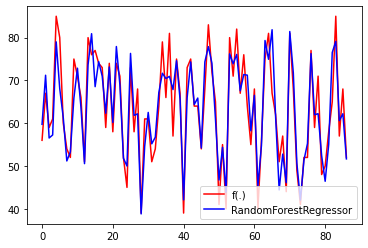

In [15]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(criterion = 'mse', n_estimators = 100, random_state = 42)

rf.fit(x_train, y_train)

error_train = mean_squared_error(y_train, rf.predict(x_train), squared=False)
error_test = mean_squared_error(y_test, rf.predict(x_test), squared=False)

print("Ein: %0.3f"  %(error_train/100))
print("Eout: %0.3f" %(error_test/100))

time = [i for i in range(len(y_test))]

plt.plot(time, y_test, 'r-')
plt.plot(time, rf.predict(x_test), 'b-')
plt.legend(['f(.)', 'RandomForestRegressor'], loc=4)
plt.show()